<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB
Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64


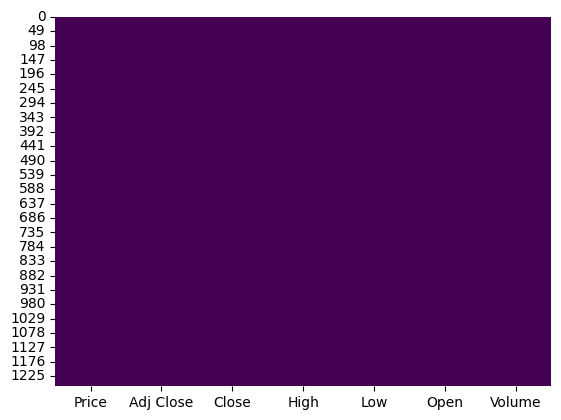

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#google dataset
google_df = pd.read_csv("googl_data_2020_2025.csv")

# Preview
google_df.head()
google_df.info()
google_df.describe()

# Missing values
print(google_df.isnull().sum())
sns.heatmap(google_df.isnull(), cbar=False, cmap="viridis")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

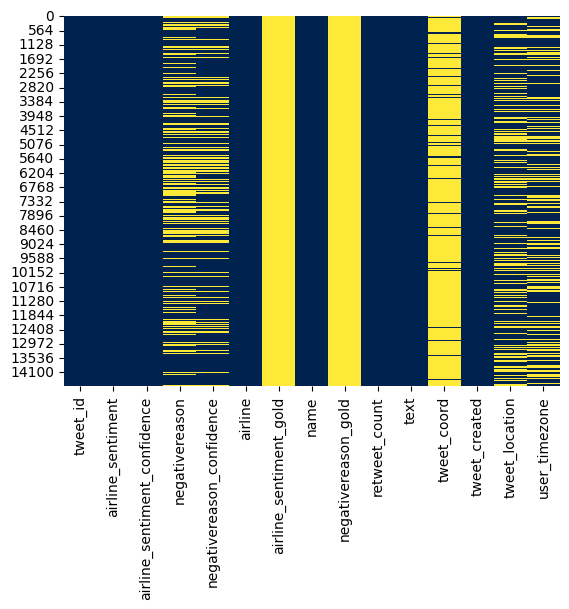

In [22]:
# Load Twitter data
import seaborn as sns
twitter_df = pd.read_csv("Tweets.csv")

twitter_df.head()
twitter_df.info()
twitter_df.describe()

# Missing values
print(twitter_df.isnull().sum())
sns.heatmap(twitter_df.isnull(), cbar=False, cmap="cividis")
plt.show()



In [18]:
import pandas as pd

# Try latin1
insta_df = pd.read_csv("Instagram data.csv", encoding="latin1")

# If still error, try cp1252
# insta_df = pd.read_csv("Instagram data.csv", encoding="cp1252")

insta_df.head()



,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [19]:
google_df.dropna().to_csv("google_clean.csv", index=False)
insta_df.dropna().to_csv("instagram_clean.csv", index=False)
twitter_df.dropna().to_csv("twitter_clean.csv", index=False)


In [20]:
merged_df = pd.concat([google_df, insta_df, twitter_df], ignore_index=True)
merged_df.to_csv("all_social_clean.csv", index=False)

In [6]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# ----------------------------
# 1. Load your datasets
twitter_df = pd.read_csv("project/twitter_clean.csv")
insta_df = pd.read_csv("project/instagram_clean.csv")
google_df = pd.read_csv("project/google_clean.csv")
# ----------------------------


# ----------------------------
# 2. Create the Dash App
# ----------------------------
app = Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Social Media Trends Dashboard", style={'textAlign': 'center'}),

    dcc.Tabs(id="tabs", value="twitter", children=[
        dcc.Tab(label="🐦 Twitter Dashboard", value="twitter"),
        dcc.Tab(label="📸 Instagram Dashboard", value="instagram"),
        dcc.Tab(label="🔍 Google Trends Dashboard", value="google"),
        dcc.Tab(label="🌍 Combined Dashboard", value="combined"),
    ]),
    html.Div(id="tabs-content")
])

# ----------------------------
# 3. Callbacks for Tabs
# ----------------------------
@app.callback(Output("tabs-content", "children"),
              Input("tabs", "value"))
def render_content(tab):
    if tab == "twitter":
        fig1 = px.histogram(twitter_df, x="airline_sentiment", title="Twitter Sentiment Distribution")
        fig2 = px.bar(twitter_df.groupby("airline")["retweet_count"].mean().reset_index(),
                      x="airline", y="retweet_count", title="Avg Retweets per Airline")
        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ])

    elif tab == "instagram":
        fig1 = px.histogram(insta_df, x="Sentiment", title="Instagram Sentiment Distribution")
        fig2 = px.bar(insta_df["Hashtags"].value_counts().head(10).reset_index(),
                      x="index", y="Hashtags", title="Top 10 Hashtags")
        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ])

    elif tab == "google":
        fig1 = px.line(google_df, x="date", y="trend_score", color="keyword",
                       title="Google Trends Over Time")
        return html.Div([
            dcc.Graph(figure=fig1)
        ])

    elif tab == "combined":
        combined_counts = pd.DataFrame({
            "Platform": ["Twitter", "Instagram", "Google"],
            "Posts": [len(twitter_df), len(insta_df), len(google_df)]
        })
        fig1 = px.pie(combined_counts, names="Platform", values="Posts", title="Posts by Platform")
        return html.Div([
            dcc.Graph(figure=fig1)
        ])

# ----------------------------
# 4. Run the Dashboard
# ----------------------------
if __name__ == "__main__":
    app.run_server(debug=True)


ObsoleteAttributeException: app.run_server has been replaced by app.run